In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyLDAvis==3.3.1 gensim==3.8.3 spacy==3.1.3

!pip install spacy
!python -m spacy download es_core_news_lg

!pip install demoji
!pip install emoji --upgrade

import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.ldamodel import LdaModel
# Importing modules
import pandas as pd
import os

     |████████████████████████████████| 1.7 MB 5.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.2 MB 1.2 MB/s 
     |████████████████████████████████| 5.9 MB 37.4 MB/s 
     |████████████████████████████████| 451 kB 63.8 MB/s 
     |████████████████████████████████| 10.1 MB 43.4 MB/s 
     |████████████████████████████████| 653 kB 44.8 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=27dbe5dc66e73991cd870184e4a5baeda25c1b601451cb813788fe331ae6ea59
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successful

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

In [3]:
import random
import numpy as np
"""
file = '/content/drive/MyDrive/NLP/dades.csv'
np.random.seed(4)
paper1 = pd.read_csv(file, header=0,
            skiprows=lambda i: i>0 and np.random.choice(50))


paper1.head()
paper1.tail()

paper2 = paper1.drop(columns=['_id.oid', 'date.date', 'favorites','hashtags', 'idTweet.numberLong', 'location','retweets','username'], axis=1)
paper2.head()
paper2.tail()
papers = paper2
"""
# Read data into papers
papers = pd.read_csv('/content/drive/MyDrive/NLP/datasets/labeled_corpus.csv')
# Print head4
papers.head(10)
#papers.tail()

,id,text,hatespeech
0,828025263321657348,Ismael es egocentrico porque se vuelve loca si...,0
1,828023016785326081,Para el cine serías un progre guay y para lo d...,0
2,828025128797741057,..ya tardaba en salir quien pronunciase nombre...,0
3,828025087815274496,"(Esto no es un discurso político y razonado, o...",0
4,828025006626058241,"Muy despreciados,siiii,pero todos vestidos de ...",1
5,828024709761658880,marica explicame porque a veces no te entiendo...,1
6,828024543847600128,Abusan de 1400 niñas durante 16 años porque la...,0
7,828024390315102208,"Es ridículo, ayer le dije a un árabe que no er...",0
8,828024212824739841,39. Me considero género no binario y mis prono...,0
9,828024204704505858,@SuperFalete jajajajaja. Te jodes maricon.,1


In [4]:
# Remove the columns
papers = papers.drop(columns=['id', 'hatespeech'], axis=1)
papers.head()
papers.tail()


,text
5995,"Sea independentista o constitucionalista, la d..."
5996,@Bernithedude Llave de gobierno de qué si hay ...
5997,@13Pardis @guenhwyvarblack Los carlinos son un...
5998,Aplausos en el partido de Colau cuando anuncia...
5999,@Rafa_Hernando La Constitución es independenti...


In [5]:
# Load the regular expression library
import re
# Remove punctuation
papers['text'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
#paper1['text'] = paper1['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['text'] = papers['text'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['text'].head()





<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-5-88003b1c641b>:4: DeprecationWarning: invalid escape sequence \.
  papers['text'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    ismael es egocentrico porque se vuelve loca si...
1    para el cine serías un progre guay y para lo d...
2    ya tardaba en salir quien pronunciase nombre c...
3    (esto no es un discurso político y razonado ob...
4    muy despreciadossiiiipero todos vestidos de al...
Name: text, dtype: object

In [6]:
import gensim
from gensim.utils import simple_preprocess
import re
import demoji
import emoji
from emoji import UNICODE_EMOJI
  
demoji.download_codes()
# treu les ñ mirar com no trure emogis i substituir
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data = papers.text.values.tolist()
datoooos = data
print("Text sense canvis:") 
print(data[0])
print(data[1])
print(data[2])
print(data[3])

def find(string):
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  url = re.findall(regex,string)
  return [x[0] for x in url]

pepe = []  
for i in data:
  if (len(find(i)) > 0):
    trobat = find(i)
    for j in trobat:
      #print("Urls: ", j)
      pepe.append(i.replace(j,"Youtube_Video"))
  else:
    pepe.append(i) 
print(" Text NO URLs:")     
print(pepe[0])
print(pepe[1])
print(pepe[2])
print(pepe[3])

gus= []
for i in pepe:
  maria = emoji.demojize(i, language='es')
  gus.append(maria)

print("Text emoji to string:")
print(gus[0])
print(gus[1])
print(gus[2])
print(gus[3])

data = gus

data_words = list(sent_to_words(data))
print("Text to list:") 
print(data_words[0])
print(data_words[1])
print(data_words[2])
print(data_words[3])
j = 0

for i in data_words:
  if j < 15:
    print("Diferencies:", j)
    print(i)
    print(gus[j])
    j= j+1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  


Text sense canvis:
ismael es egocentrico porque se vuelve loca si le dicen que tiene el pelo bonito😂😂😂😂 eso se define con otro objetivo #firstdates251
para el cine serías un progre guay y para lo demás un facha fascista https://tco/ap7wyvzpqw
ya tardaba en salir quien pronunciase nombre catalán sílaba aguda como si fuese plana [es eduááárd][ernééést][albééért] no son ingleses
(esto no es un discurso político y razonado obviamente solo una llamada de atención en plan "joder no cuesta tanto saber cosas")
 Text NO URLs:
ismael es egocentrico porque se vuelve loca si le dicen que tiene el pelo bonito😂😂😂😂 eso se define con otro objetivo #firstdates251
para el cine serías un progre guay y para lo demás un facha fascista Youtube_Video
ya tardaba en salir quien pronunciase nombre catalán sílaba aguda como si fuese plana [es eduááárd][ernééést][albééért] no son ingleses
(esto no es un discurso político y razonado obviamente solo una llamada de atención en plan "joder no cuesta tanto saber cosas

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [8]:
#NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
print("Stopwords pre determinades:",stop_words)
stop_words.extend(['buenos', '-', 'http_co','https_tco', 'jajajajaja', 'dia','ext_ud','xwzey','lqxqyb',' ','_',''])
print("Stopwords afegides determinades:",stop_words)
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN','PROPN']):
#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def lemmatizationTOT(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Stopwords pre determinades: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nues

In [9]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


#pepe = []
#for i in data_words_nostops:
  #for j in i:
    #pepe.append(j.replace("http_co"," "))
    #pepe.append(j.replace("https_tco"," "))

#data_words_nostops = pepe
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("es_core_news_md")
#data_lemmatizedMD = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN'])

#nlp = spacy.load("en_core_news_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatizedAmbTot = lemmatizationTOT(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#data_lemmatizedNAV = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB'])
#data_lemmatizedNA = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ'])
#nlp = spacy.load("es_core_news_sm")
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN'])

nlp = spacy.load("es_core_news_lg")
data_lemmatizedLG = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN'])
j = 0
for i in data_words_bigrams:
  if (j< 7):
    doc = nlp(" ".join(i))
    for token in doc:
      print("Tipus de paraula LG:", j, token.text, token.pos_, token.dep_)
    j = j+ 1

pepe = []

for i in data_lemmatizedLG:
  llista = []
  for j in i:
    llista.append(j.replace("-","").replace("http_tco","").replace("https_tco","").replace("_",""))
  pepe.append(llista)
  
    

data_lemmatizedFinal = pepe    
j = 0
for i in data_words_nostops:
  if j < 8:
    print(j)
    print("Text normal                        ", data_words[j])
    print("text nostops:                      ", i)
    print("Text to convert without Stopwords: ", data_words_bigrams[j])
    #print("Text lemmatized NOUNs and PROPN MF ",data_lemmatizedMD[j])
    #print("Text lemmatized NOUNs and PROPN    ",data_lemmatized[j])
    print("Text lemmatized NOUNs and PROPN LG ",data_lemmatizedLG[j])
    print("Text lemmatized NOUNs and PROPN FINAL",data_lemmatizedFinal[j])
    j= j+1 


#print("diference 3:") 
#print("data_words",data_words[3])
#print("No Stop Words",data_words_nostops[3])
#print(data_lemmatizedAmbTot[3])
#print(data_lemmatizedNAV[3])
#print(data_lemmatizedNA[3])
#print(data_lemmatized[3])

Tipus de paraula LG: 0 ismael PROPN nsubj
Tipus de paraula LG: 0 egocentrico PROPN flat
Tipus de paraula LG: 0 vuelve VERB ROOT
Tipus de paraula LG: 0 loca NOUN obj
Tipus de paraula LG: 0 si SCONJ mark
Tipus de paraula LG: 0 dicen VERB advcl
Tipus de paraula LG: 0 pelo NOUN obj
Tipus de paraula LG: 0 bonito ADJ amod
Tipus de paraula LG: 0 define VERB advcl
Tipus de paraula LG: 0 objetivo NOUN obj
Tipus de paraula LG: 0 firstdates ADJ amod
Tipus de paraula LG: 1 cine NOUN ROOT
Tipus de paraula LG: 1 progre ADJ cop
Tipus de paraula LG: 1 guay ADJ amod
Tipus de paraula LG: 1 demás DET det
Tipus de paraula LG: 1 facha NOUN nsubj
Tipus de paraula LG: 1 fascista ADJ amod
Tipus de paraula LG: 1 youtube_video ADV amod
Tipus de paraula LG: 2 tardaba VERB ROOT
Tipus de paraula LG: 2 salir VERB csubj
Tipus de paraula LG: 2 pronunciase VERB advcl
Tipus de paraula LG: 2 nombre NOUN obj
Tipus de paraula LG: 2 catalán ADJ amod
Tipus de paraula LG: 2 sílaba NOUN appos
Tipus de paraula LG: 2 aguda ADJ 

# Create Dictionary, Corpus 

In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedFinal)
# Create Corpus
texts = data_lemmatizedFinal
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
for i in texts:
  print(i)

print(corpus[:1])
print(corpus[:2])
print(corpus[:3])
print(corpus[:4])


Streaming output truncated to the last 5000 lines.
['loca', 'diagnóstico', 'gilipolla', 'youtubevideo']
['josegor', 'foncu', 'impuesto', 'fuerza', 'producto', 'servicio']
['pp', 'mariano', 'boicot', 'producto', 'israel', 'cava']
['miquelpujol', 'sport', 'jllmerlos', 'gol', 'joder', 'catalanofobia']
['villarrealcf', 'historia', 'ayuda', 'afición']
['itachi', 'espanya', 'espero', 'estiguis']
['dictador']
['alejandrosanmo', 'españa', 'dueño', 'aplicación']
['sánchez', 'adversario']
['anala', 'odio', 'regaliz', 'negro', 'jajajaja']
['reyes', 'maricón', 'reyes', 'maricón', 'reyees', 'mariiicoooooón', 'bajito']
['zaragoza', 'pedrosánchez', 'adversario']
['zaragoza', 'pedrosánchez', 'adversario', 'vy', 'luv', 'youtubevideo']
['diegoelfo', '', 'leyenda']
['xthorinii', 'hija', 'nieto', 'nieta']
['chupala', 'mierda']
['peñón']
['estereotipo', 'género', 'ideología', 'elpaisdeportes']
['lusilu', 'bollera']
['comedia', 'tema']
['imp', 'gobierno', 'régimen', 'dif', 'invasión']
['catalunya', 'castell

# Train LDA model

In [11]:
# Train LDA model.
from gensim.models import LdaModel
from gensim.models.callbacks import PerplexityMetric
random_state_prova = np.random.choice(50)
def generation_LDAModel(num_topics):
    # Set training parameters.
    num_topics = num_topics
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    
    # Make a index to word dictionary.
    ##temp = dictionary[0]  # This is only to "load" the dictionary.
    #id2word = dictionary.id2token

    perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every,
        random_state = random_state_prova,
        callbacks=[perplexity_logger]
    )

    top_topics = model.top_topics(corpus) #, num_words=20)

    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    print('Average topic coherence: %.4f.' % avg_topic_coherence)

    from pprint import pprint
    pprint(top_topics)

    return model

model = generation_LDAModel(10)
    

Average topic coherence: -15.5114.
[([(0.0807407, 'voto'),
   (0.04995721, 'mayoríaabsoluta'),
   (0.03695145, 'escaño'),
   (0.033382274, 'mayoría'),
   (0.029421765, 'victoria'),
   (0.02083411, 'cataluña'),
   (0.018436423, 'partido'),
   (0.016031016, 'maricón'),
   (0.0102497125, 'rajoy'),
   (0.010168101, 'millón'),
   (0.009905132, 'tv'),
   (0.00867536, 'independentismo'),
   (0.008540564, 'bloque'),
   (0.008420668, 'youtubevideo'),
   (0.007963086, 'calle'),
   (0.007897573, 'respecto'),
   (0.007469819, 'pp'),
   (0.0073290453, 'presidenta'),
   (0.0072944993, 'catalunya'),
   (0.0072407536, 'ciutadans')],
  -12.636061425011615),
 ([(0.030968377, 'día'),
   (0.02346064, 'feminismo'),
   (0.02159847, 'hombre'),
   (0.02127151, 'mujer'),
   (0.019760154, 'año'),
   (0.017435066, 'caso'),
   (0.016809994, 'puta'),
   (0.012793165, 'mongolo'),
   (0.012353507, 'noche'),
   (0.011782272, 'asco'),
   (0.011294989, 'pesar'),
   (0.011127092, 'gente'),
   (0.01092639, 'madre'),
   (

# Grafica LDA Model 

In [12]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.059858  0.063975       1        1  12.782922
8      0.112096 -0.013122       2        1  11.854323
5      0.093363  0.119923       3        1  11.204525
1      0.069898 -0.022755       4        1  10.500667
0     -0.010092 -0.129956       5        1  10.185735
6      0.003783 -0.212090       6        1   9.488366
3      0.058353  0.137860       7        1   9.264937
4      0.079354 -0.020709       8        1   9.172770
9     -0.248804  0.068737       9        1   8.220122
2     -0.217807  0.008139      10        1   7.325633, topic_info=           Term        Freq       Total Category  logprob  loglift
1795    mayoría  225.000000  225.000000  Default  30.0000  30.0000
767        voto  172.000000  172.000000  Default  29.0000  29.0000
254    cataluña  203.000000  203.000000  Default  28.0000  28.0000
1538  ciudadano  178.000000  178.000000  Default  27.0000  27.0000
6         facha  318.000000  318.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
270     respeto    8.351472   10.779192  Topic10  -5.4249   2.3586
6         facha   20.046706  318.369138  Topic10  -4.5493  -0.1514
559    gobierno   13.312107   83.188067  Topic10  -4.9587   0.7814
451   refugiado    8.865954   17.456204  Topic10  -5.3651   1.9363
7957     escaño   10.274581   89.530219  Topic10  -5.2177   0.4489

[462 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
187       1  0.606275                 
187       2  0.115481                 
187       6  0.079393                 
187       7  0.137134                 
187       8  0.064958                 
...     ...       ...              ...
25        7  0.398486     youtubevideo
25        8  0.177428     youtubevideo
25        9  0.052356     youtubevideo
8439      8  0.956325  yovotociutadans
3086     10  0.985188            éxito

[525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 6, 2, 1, 7, 4, 5, 10, 3])

# Lda Model Multicore

In [13]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       #random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       random_state = random_state_prova,
                                       per_word_topics=True)

# Lda Model grafic

In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.362598  0.002616       1        1  14.247695
1      0.029730 -0.055285       2        1  11.819269
5      0.047356 -0.178139       3        1  10.828660
3      0.046173  0.289923       4        1  10.749370
0      0.042056 -0.009079       5        1  10.257908
8      0.039385 -0.009786       6        1   9.402028
2      0.039050 -0.010724       7        1   8.586929
7      0.038909 -0.009868       8        1   8.353646
6      0.041002 -0.011001       9        1   8.144649
4      0.038937 -0.008657      10        1   7.609845, topic_info=             Term        Freq       Total Category  logprob  loglift
6           facha  397.000000  397.000000  Default  30.0000  30.0000
1795      mayoría  375.000000  375.000000  Default  29.0000  29.0000
212       partido  318.000000  318.000000  Default  28.0000  28.0000
767          voto  354.000000  354.000000  Default  27.0000  27.0000
254      cataluña  349.000000  349.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
425         hecho   11.257843   12.081963  Topic10  -5.1644   2.5051
2582  sentimiento   10.777461   11.601640  Topic10  -5.2080   2.5020
4835         baja   10.665250   11.489979  Topic10  -5.2184   2.5012
2314        prisa   10.427633   11.254198  Topic10  -5.2410   2.4994
925      feminazi   10.239866   11.063908  Topic10  -5.2591   2.4983

[333 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
187       6  0.994356                 
658       9  0.959762            abril
386       8  0.973348          acuerdo
3569      5  0.977269         adacolau
6830      3  0.941700  adoctrinamiento
...     ...       ...              ...
369      10  0.944735            vídeo
429       7  0.992412               xd
25        1  0.998165     youtubevideo
2090      6  0.947665             zona
3086      8  0.971056            éxito

[305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 6, 4, 1, 9, 3, 8, 7, 5])

# Paraules per cada cluster

In [15]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"españa" + 0.034*"constitución" + 0.024*"parte" + 0.023*"persona" + '
  '0.018*"patriotismo" + 0.015*"trump" + 0.015*"palabra" + 0.013*"mano" + '
  '0.013*"discurso" + 0.012*"govern"'),
 (1,
  '0.058*"victoria" + 0.048*"puigdemont" + 0.027*"independencia" + '
  '0.027*"izquierda" + 0.022*"género" + 0.017*"cojón" + 0.016*"gay" + '
  '0.016*"loca" + 0.014*"realidad" + 0.014*"violencia"'),
 (2,
  '0.090*"mayoríaabsoluta" + 0.034*"rajoy" + 0.030*"cara" + 0.027*"xd" + '
  '0.027*"millón" + 0.026*"grupo" + 0.025*"madre" + 0.025*"odio" + '
  '0.014*"mundo" + 0.012*"parlament"'),
 (3,
  '0.143*"facha" + 0.135*"mayoría" + 0.039*"catalán" + 0.030*"erc" + '
  '0.027*"cs" + 0.025*"verdad" + 0.023*"maricón" + 0.018*"cuñado" + '
  '0.012*"vergüenza" + 0.011*"rojo"'),
 (4,
  '0.118*"elección" + 0.047*"resultado" + 0.031*"joder" + 0.027*"vez" + '
  '0.021*"feminismo" + 0.017*"independentismo" + 0.013*"cat" + 0.012*"suma" + '
  '0.012*"sociedad" + 0.009*"error"'),
 (5,
  '0.113*"partido" 

# Coherence Score 

In [16]:
from gensim.models import CoherenceModel
# Compute Coherence Score Model 
coherence_model_lda = CoherenceModel(model=model, texts=data_lemmatizedFinal, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# Compute Coherence Score LDA Model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatizedFinal, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5670765965692122

Coherence Score:  0.6463193614604719


# Generació de grafiques 
per aconseguir nombre de topics

In [17]:
# to evaluate the optimus number of topics
from gensim.models import LsiModel
from gensim.models import LdaModel
import matplotlib.pyplot as plt

from gensim.models import CoherenceModel

# to evaluate the optimus number of topics
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
   
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
   
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        #print(num_topics)
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state = random_state_prova)
         # print(lm)
        lm_list.append(lm)
        #print(lm_list)
        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        #print('\nCoherence Score: ', coherence_lda)
       # print("surt:")
        #print(coherence_lda)
        #cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        #print(cm)
        
        c_v.append(coherence_lda)
        #print(cm.get_coherence())

        #coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    #return coherence_model_lda.get_coherence()
       
    
   
    return lm_list, c_v


# %%time
lmlist_lsi, c_v = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=10, model= "ls")
lmlist_lsi1, c_v1 = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=15, model= "ls")
#lmlist_lsi2, c_v2 = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=10, model= "lsi")
#lmlist_lsi3, c_v3 = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=15, model= "lsi")


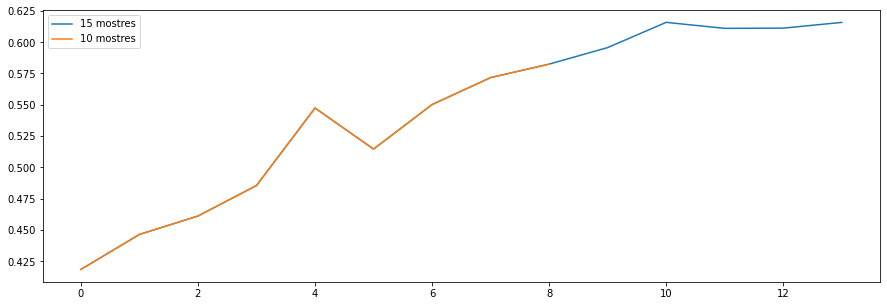

In [18]:

plt.figure(figsize = (15, 5))
plt.plot(c_v1, label = '15 mostres')
plt.plot(c_v, label = '10 mostres')

plt.legend()

plt.show()

#plt.figure(figsize = (15, 5))
#plt.plot(c_v2, label = '10 mostres')
#plt.plot(c_v3, label = '15 mostres')
#plt.legend()

#plt.show()



In [19]:
model_hate = generation_LDAModel(2)
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_hate, corpus, id2word)
LDAvis_prepared

Average topic coherence: -11.7324.
[([(0.021662336, 'facha'),
   (0.020669604, 'cataluña'),
   (0.019535072, 'mayoría'),
   (0.013986409, 'elección'),
   (0.013765085, 'partido'),
   (0.0135415355, 'ciudadano'),
   (0.010898401, 'mayoríaabsoluta'),
   (0.008795802, 'españa'),
   (0.008106077, 'catalán'),
   (0.007761187, 'gente'),
   (0.007648102, 'pp'),
   (0.0067270994, 'catalunya'),
   (0.006069872, 'ley'),
   (0.005968227, 'día'),
   (0.005585539, 'escaño'),
   (0.0051176017, 'erc'),
   (0.0051021627, 'año'),
   (0.004793081, 'derecha'),
   (0.0045868773, 'dictador'),
   (0.004523572, 'feminismo')],
  -9.821267596518359),
 ([(0.026329435, 'youtubevideo'),
   (0.018084476, 'voto'),
   (0.008801062, 'resultado'),
   (0.0087178275, 'mierda'),
   (0.007693608, 'cup'),
   (0.007281536, 'fascista'),
   (0.006334857, ''),
   (0.006235127, 'victoria'),
   (0.005762148, 'gobierno'),
   (0.005686633, 'ultraderecha'),
   (0.005421482, 'maricón'),
   (0.0050877905, 'puta'),
   (0.0050114975, '

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.164609  0.0       1        1  52.812905
0     -0.164609  0.0       2        1  47.187095, topic_info=              Term        Freq       Total Category  logprob  loglift
25    youtubevideo  360.000000  360.000000  Default  30.0000  30.0000
6            facha  265.000000  265.000000  Default  29.0000  29.0000
254       cataluña  252.000000  252.000000  Default  28.0000  28.0000
834       elección  171.000000  171.000000  Default  27.0000  27.0000
212        partido  168.000000  168.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
43           gente   94.772446  114.762271   Topic2  -4.8586   0.5597
54          rovira   39.341394   40.576999   Topic2  -5.7378   0.7201
7957        escaño   68.205445  120.473909   Topic2  -5.1876   0.1821
13            cosa   53.334294   99.504142   Topic2  -5.4335   0.1274
187                  41.545423  128.123431   Topic2  -5.6833  -0.3752

[110 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
187       1  0.679033              
187       2  0.327809              
180       1  0.984972       afición
466       1  0.015908           año
466       2  0.986298           año
...     ...       ...           ...
429       2  0.014571            xd
25        1  0.997976  youtubevideo
25        2  0.002772  youtubevideo
3086      1  0.978694         éxito
3086      2  0.017477         éxito

[116 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# Creacio de nou dataset

In [20]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0, tweets = 0):
    # Init output
    sent_topics_df = pd.DataFrame()
    pepe = pd.DataFrame()
    contents = pd.DataFrame()

    

   
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['hatespeech', 'Perc_Contribution', 'Topic_Keywords']

   # Add original text to the end of the output
    for i in tweets:
      pepe = pepe.append(pd.Series(i),ignore_index=True)
    pepe.columns = ['text']

    for j in texts:
      contents = contents.append(pd.Series([j]),ignore_index =True)
    contents.columns = ['texts']
    
    sent_topics_df = pd.concat([pepe,sent_topics_df, contents,], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model_hate, corpus=corpus, texts=data_lemmatizedFinal,tweets = datoooos)
print(df_topic_sents_keywords)

df_topic_sents_keywords.to_csv('HateProva.csv')

                                                   text  hatespeech  \
0     ismael es egocentrico porque se vuelve loca si...         1.0   
1     para el cine serías un progre guay y para lo d...         0.0   
2     ya tardaba en salir quien pronunciase nombre c...         0.0   
3     (esto no es un discurso político y razonado ob...         0.0   
4     muy despreciadossiiiipero todos vestidos de al...         0.0   
...                                                 ...         ...   
6157                                                NaN         0.0   
6158                                                NaN         1.0   
6159                                                NaN         1.0   
6160                                                NaN         0.0   
6161                                                NaN         0.0   

      Perc_Contribution                                     Topic_Keywords  \
0                0.8755  youtubevideo, voto, resultado, mierda, cup, 

https://www.geeksforgeeks.org/python-check-url-string/
https://colab.research.google.com/github/vitojph/kschool-nlp-18/blob/master/notebooks/spacy.ipynb#scrollTo=nXyqggTJwqeb

http://www.aic.uva.es/cuentapalabras/nubes-de-palabras.html

https://www.youtube.com/watch?v=59BKHO_xBPA


# Comparacio entre datasets

In [21]:
!pip install datacompy

In [22]:
import datacompy, pandas as pd
df1 = pd.read_csv('/content/HateProva.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NLP/datasets/labeled_corpusTOTCorrecte.csv')
print(df2.head(10))
print(df1.head(10))

UnicodeDecodeError: ignored

In [ ]:
df1 = pd.read_csv('/content/HateProva.csv')
df1 = df1.drop(columns=['Perc_Contribution', 'Topic_Keywords', 'texts'], axis=1)


print("Hate 0:",len(df1[df1['hatespeech']== 0]))
print("Hate 1:",len(df1[df1['hatespeech']== 1]))
print("Hate total:",len(df1['hatespeech']))
lenght1 = len(df1['hatespeech'])
hate1= df1[df1['hatespeech']== 1]
hate2= df1[df1['hatespeech']== 0] 
print(hate1)
print(hate2)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/NLP/datasets/labeled_corpusTOTCorrecte.csv')
df2 = df2.drop(columns=['id'], axis=1)
#df2[df2['hatespeech']== '1']
print("Hate 0:",len(df2[df2['hatespeech']== '0']))
print("Hate 1:",len(df2[df2['hatespeech']== '1']))
print("Hate total:",len(df2['hatespeech']))

labeled1= df2[df2['hatespeech']== '1']
labeled2= df2[df2['hatespeech']== '0'] 
print(labeled1)
print(labeled2)

for i in range(lenght1):
  if((df2[df2['hatespeech']== '0'] and df1[df1['hatespeech']== 1])):
    print("0")
  if ((df2[df2['hatespeech']== '1'] and df1[df1['hatespeech']== 0]) ):
    print(i)

In [ ]:
# Data to plot
labels = [0, 1]
sizes = [3257,2905]
colors = ['#fff87f','#C9C9E5']
explode = (0, 0.3) # explode 1st slice



# Plot
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12})



llabels = ["No Hate","Hate"]
plt.legend(llabels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.axis('equal')
plt.show()

In [ ]:
# Data to plot
labels = [0, 1]
sizes = [4366,1557]
colors = ['#fff87f','#C9C9E5']
explode = (0, 0.3) # explode 1st slice



# Plot
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12})



llabels = ["No Hate"," Hate"]
plt.legend(llabels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd

discrepancies= []

df1 = pd.read_csv('/content/HateProva.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NLP/datasets/labeled_corpusTOTCorrecte.csv')
#df2['hatespeech']=df2['hatespeech'].astype(int)
df1['hatespeech']=df1['hatespeech'].astype(int)

df1 = df1.drop(columns=['Perc_Contribution', 'Topic_Keywords', 'texts'], axis=1)
df2 = df2.drop(columns=['id'], axis=1)

print(df1.head(3))
print(df2.head(3))
a= 0
for i in df1:
  if(i.hatespeech.valeu != df2.hatespeech.value):
    discrepancies[a] = df2.text.value.tolist()
    a= a+1

for i in discrepancies:
  print(i)

In [ ]:
import datacompy
import pandas as pd
df1 = pd.read_csv('/content/HateProva.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NLP/datasets/labeled_corpusTOTCorrecte.csv')

df1['hatespeech']=df1['hatespeech'].astype(int)

df1 = df1.drop(columns=['Perc_Contribution', 'Topic_Keywords', 'texts'], axis=1)
df2 = df2.drop(columns=['id'], axis=1)
df2['hatespeech']=pd.to_numeric(df2['hatespeech'])
print(df1.head(3))
print(df2.head(3))
print(df1.tail(3))
print(df2.tail(3))

compare = datacompy.Compare(df1,df2,
join_columns='hatespeech',  #You can also specify a list of columns eg ['policyID','statecode']
abs_tol=0, #Optional, defaults to 0
rel_tol=0, #Optional, defaults to 0
df1_name='Original', #Optional, defaults to 'df1'
df2_name='New' #Optional, defaults to 'df2'
)
print(compare.report())

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topics = (model_hate.print_topics())
print(topics)
top1 = topics[0]
print(top1)
top2 = topics[1]
print(top2)

wordcloud = WordCloud().generate_from_frequencies(top1)
plt.imshow(wordcloud)